# Agrupamiento Jerárquico


## ¿Qué es?
*   El agrupamiento jerárquico es un método de análisis de agrupamiento que busca crear una jerarquía en los grupos creados.
*   Es una técnica no-supervisada de análisis exploratorio de datos.
*   A diferencia de otras técnicas de agrupación, HC no requiere la especificación inicial del número de grupos a ser buscados. Pero requiere de una métrica de disimilaridad entre grupos disjuntos de observaciones.


El agrupamiento jerárquico consiste en crear un árbol de combinación binario, empezando con los datos como hojas (singleton sets) y proceder combinando de dos en dos los sub-conjunto más “cercanos” hasta llegar a la raíz del árbol que contiene a todos los elementos de X.

De esta forma, el modelo produce una representación jerárquica en la que los clusters de cada nivel de la jerarquía fueron creados mediante la combinación de clusters en el nivel inferior.
Esta técnica se representa comúnmente mediante un dendrograma, que es un diagrama en forma de árbol que nos permite visualizar cómo se forman los grupos.

### Aplicaciones de agrupamiento jerárquico.
El agrupamiento jerárquico es utilizado en diversas áreas. Algunas de sus aplicaciones incluyen:
*   Biología: Para crear árboles filogenéticos que muestran relaciones entre especies.
*   Análisis de mercado: Para segmentar clientes con características similares.
*   Procesamiento de lenguaje natural: Para agrupar palabras o documentos similares.
*   Imagenología médica: Para clasificar patrones o enfermedades en imágenes.


*   Identificar agrupaciones naturales en los datos. Esto puede ser útil para el análisis exploratorio de datos y la generación de hipótesis.
*   Reconocimiento de patrones: en el tratamiento de imágenes y señales. Puede ayudar a identificar patrones y estructuras en los datos que pueden no ser visibles a simple vista.
*   Identificar patrones en los datos sin necesidad de datos etiquetados. Esto puede ser útil en situaciones en las que los datos etiquetados no están disponibles o son caros de obtener.


### Estrategias de agrupamiento jerárquico.
El agrupamiento jerárquico se divide en dos paradigmas básicos:
#### Aglomerativo
(bottom-up)
Comienza en el fondo (bottom) y en cada nivel combina recursivamente un par de grupos en un nuevo grupo unificado. Así, se obtiene un grupo en el siguiente nivel, y un grupo menos. El par escogido para combinarse es aquel conformado por los dos grupos con menor disimilaridad inter-grupo.vent

#### Divisivo
(top-down)
Comienzan en la parte superior (top) y en cada nivel se divide recursivamente los grupos en dos nuevos grupos en el siguiente nivel. Esta división es tal que produce dos nuevos grupos con mayor disimilaridad inter-grupo.

El agrupamiento divisivo se utiliza menos que el aglomerativo porque es más costoso computacionalmente.
Sin embargo, puede ser útil en situaciones en las que los datos están muy estructurados y el número de conglomerados se conoce de antemano.


### Tipos de enlaces de grupos: simple, completo, promedio, centroide, promedio pesado.

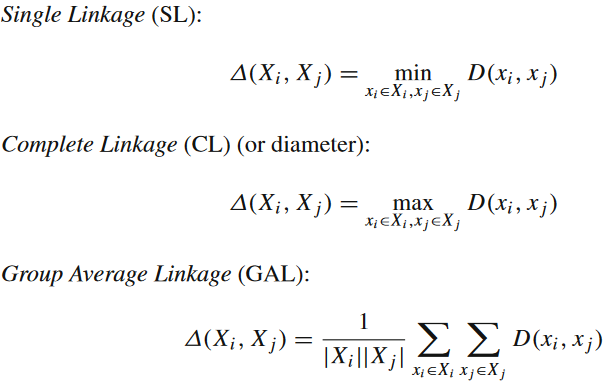

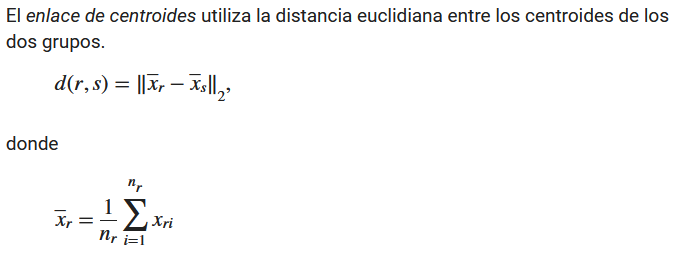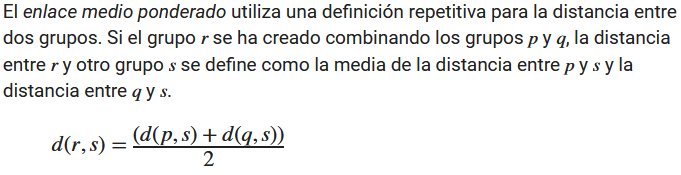

### Dendrograma

Todos los métodos aglomerativos y algunos divisivos (vistos de abajo arriba) poseen una propiedad de monotonicidad. Es decir, la disimilitud entre los grupos fusionados es monótona y aumenta con el nivel de la fusión. Así, el árbol binario puede representarse de forma que la altura de cada nodo sea proporcional al valor de la disimilitud intergrupos entre sus dos hijas. Los nodos terminales que representan observaciones individuales se representan con altura cero. Este tipo de representación gráfica se denomina dendrograma.

El dibujo visual de las agrupaciones jerárquicas transporta información valiosa para la evaluación cualitativa y cuantitativa de las distintas técnicas de agrupación jerárquica.
Las alturas de las uniones en el dendograma indican la distancia o disimilitud entre los grupos. Un corte horizontal en el dendograma nos permite seleccionar un número específico de clústeres según el nivel de similitud deseado.
Depende del usuario identificar el nivel que representa un agrupamiento “natural”. Es decir, en que las observaciones en cada grupo son lo suficientemente similares entre ellas (más que al resto).

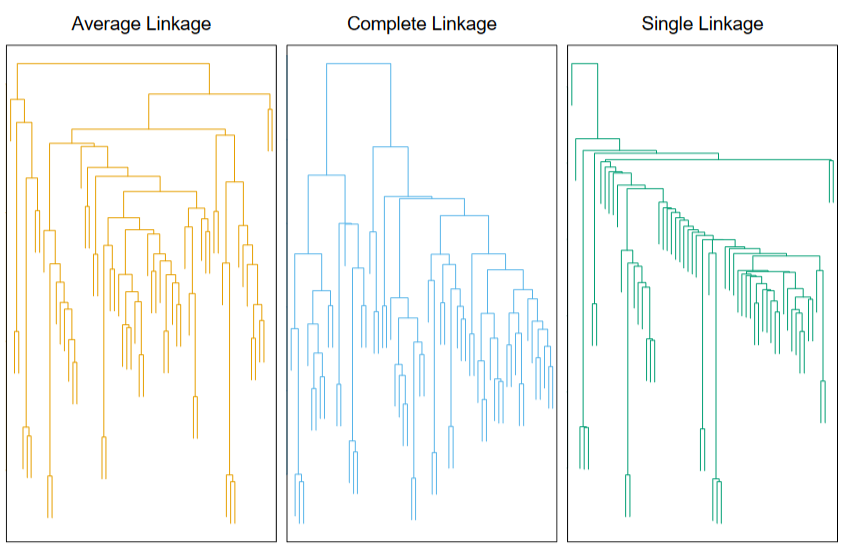

### Ventajas y desventajas del agrupamiento jerárquico.
#### Ventajas:
*   No es necesario definir el número de clústeres de antemano.
*   Proporciona una visualización clara de la estructura de los datos a través del dendograma.
*   La agrupación jerárquica no requiere un conocimiento a priori del número de conglomerados ni de sus formas, y puede manejar tanto datos numéricos como categóricos.
#### Desventajas:
*  Estrategias diferentes y pequeños cambios en los datos pueden otorgar dendogramas distintos.
*  Es computacionalmente costoso para grandes conjuntos de datos.
*  Es sensible a la elección de la métrica de distancia utilizada.
*  Una vez formados los grupos, no se pueden deshacer.

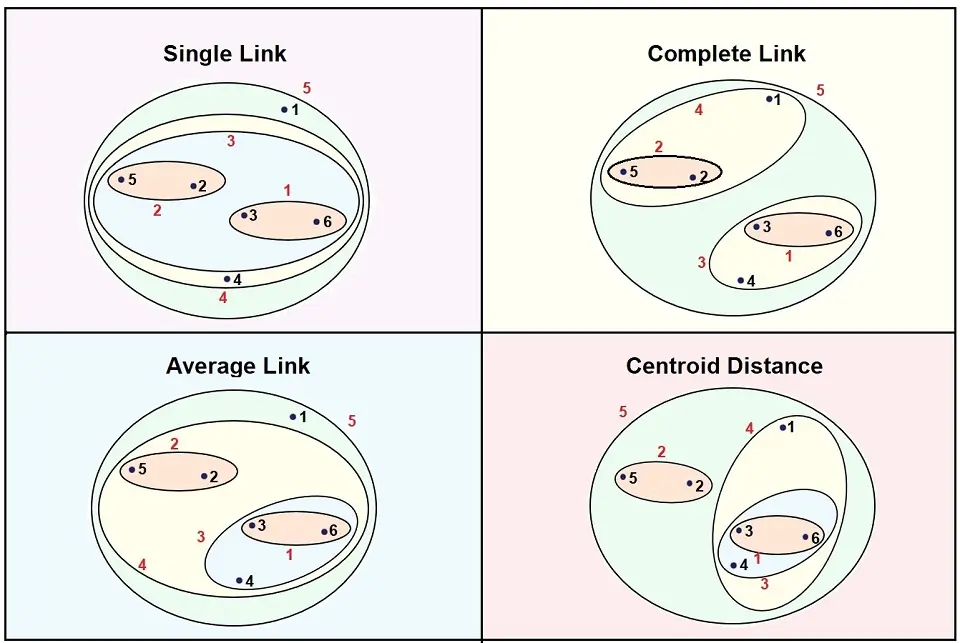


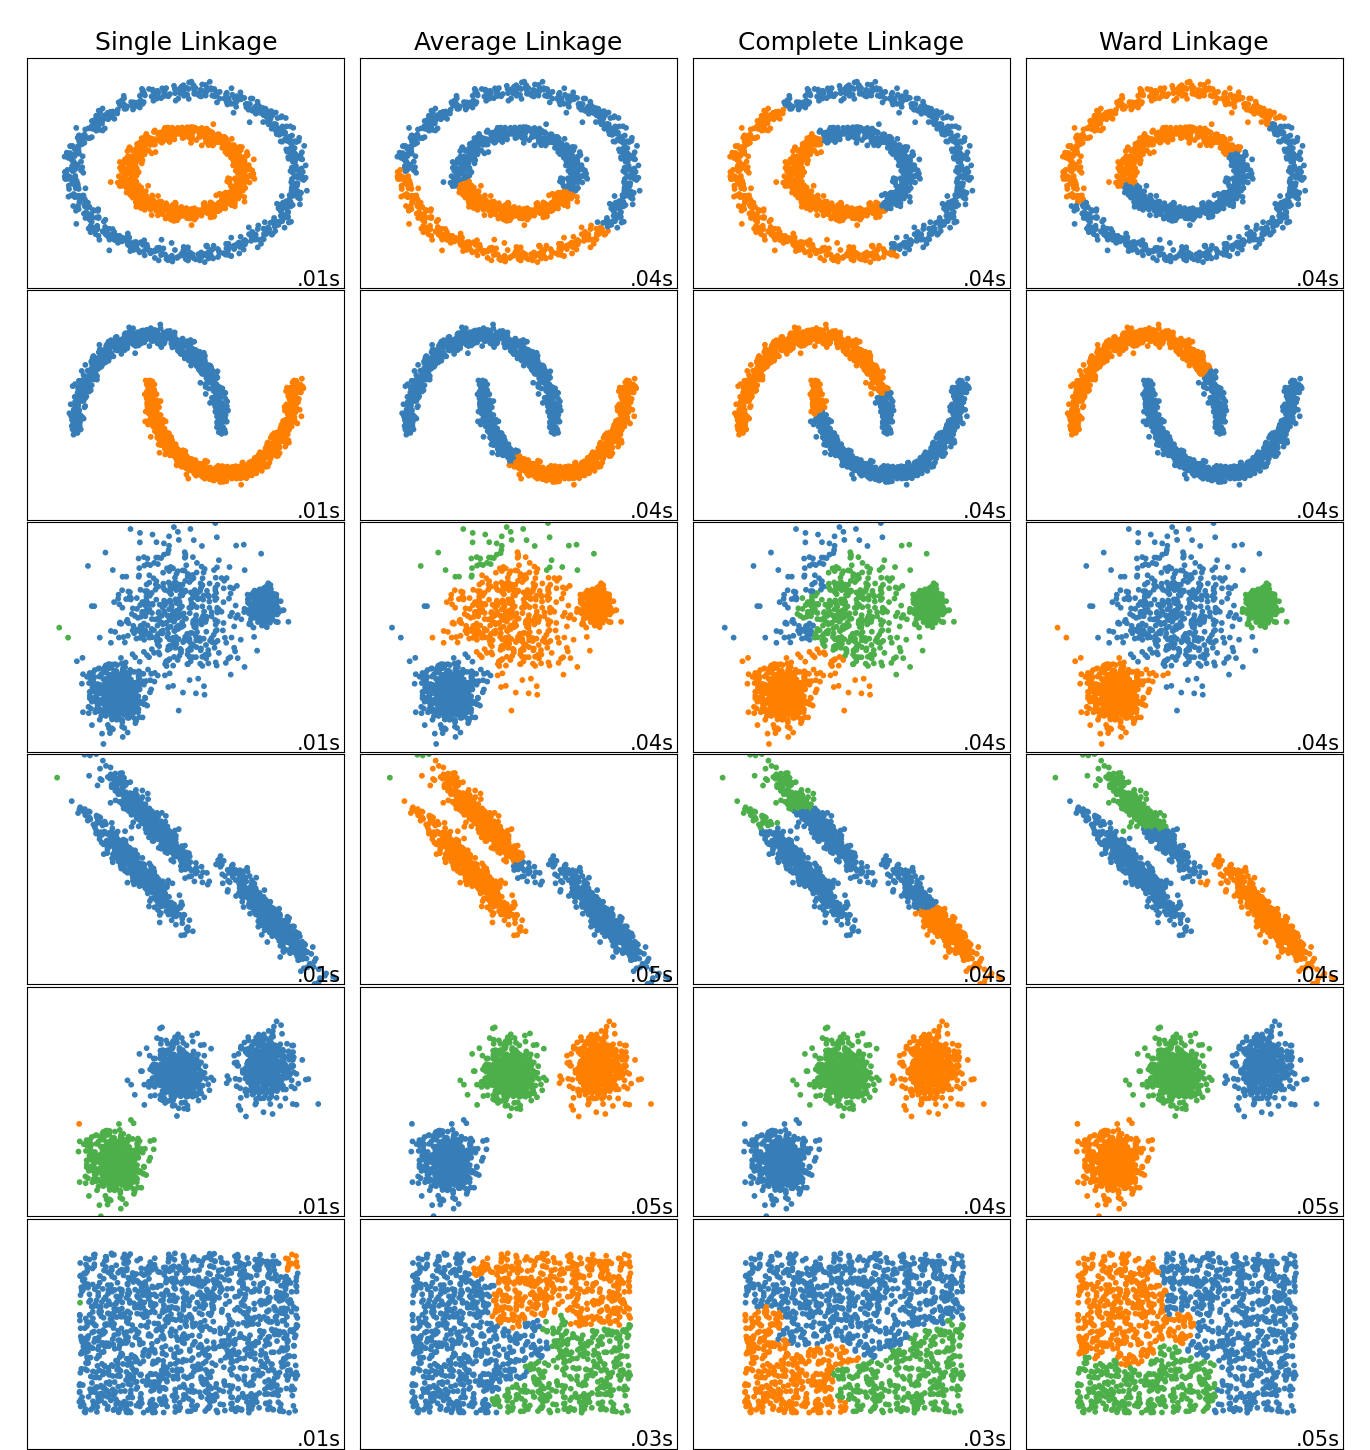

Ahora veamos algunos ejemplos de cómo modifica los resultados el usar distintas métricas y tipos de enlace

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(100)

In [ ]:
# https://archive.ics.uci.edu/static/public/186/wine+quality.zip
data = pd.read_csv('/content/winequality-white.csv', delimiter = ';', index_col= 0)
#print(data['quality'].unique())
#data.drop('quality', axis = 1, inplace = True)
data = data.iloc[np.random.randint(0, data.shape[0], 440), :].reset_index()
print(f'número de etiquetas {data["quality"].unique()}')
n_clusters_wine = len(data['quality'].unique())
data = data.iloc[:, :-1]
data

número de etiquetas [6 8 4 5 7 3 9]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
1,6.5,0.24,0.28,1.1,0.034,26.0,83.0,0.98928,3.25,0.33,12.3
2,6.7,0.20,0.24,6.5,0.044,28.0,100.0,0.99348,3.12,0.33,10.2
3,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7
4,8.2,0.68,0.30,2.1,0.047,17.0,138.0,0.99500,3.22,0.71,10.8
...,...,...,...,...,...,...,...,...,...,...,...
435,7.3,0.20,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0
436,6.3,0.60,0.44,11.0,0.050,50.0,245.0,0.99720,3.19,0.57,9.3
437,7.9,0.28,0.41,2.0,0.044,50.0,152.0,0.99340,3.45,0.49,10.7
438,7.4,0.19,0.42,6.4,0.067,39.0,212.0,0.99580,3.30,0.33,9.6


In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.060026,0.002032,0.002863,0.036016,0.000425,0.156992,0.978889,0.009152,0.029090,0.002863,0.106200
1,0.062119,0.005007,0.002596,0.050066,0.000556,0.194701,0.973507,0.009224,0.030318,0.003430,0.083443
2,0.040913,0.000779,0.002338,0.013638,0.000286,0.305224,0.948143,0.006438,0.021236,0.004806,0.074033
3,0.035236,0.001373,0.001922,0.065438,0.000206,0.205924,0.974706,0.004572,0.014552,0.002883,0.042100
4,0.066462,0.002750,0.003209,0.016043,0.000435,0.458361,0.870886,0.011311,0.035523,0.003323,0.159280


Ahora veamos los Dendrogramas para distintos tipos de enlace

In [ ]:
import scipy.cluster.hierarchy as shc

Documentación de *linkage*:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage



In [ ]:
def dendrograph(data, method, metric='euclidean'):
  plt.figure(figsize=(10, 7))
  plt.title(f"Dendrograma usando enlace {method} y métrica {metric}")
  dend = shc.dendrogram(shc.linkage(data_scaled, method= method, metric=metric))

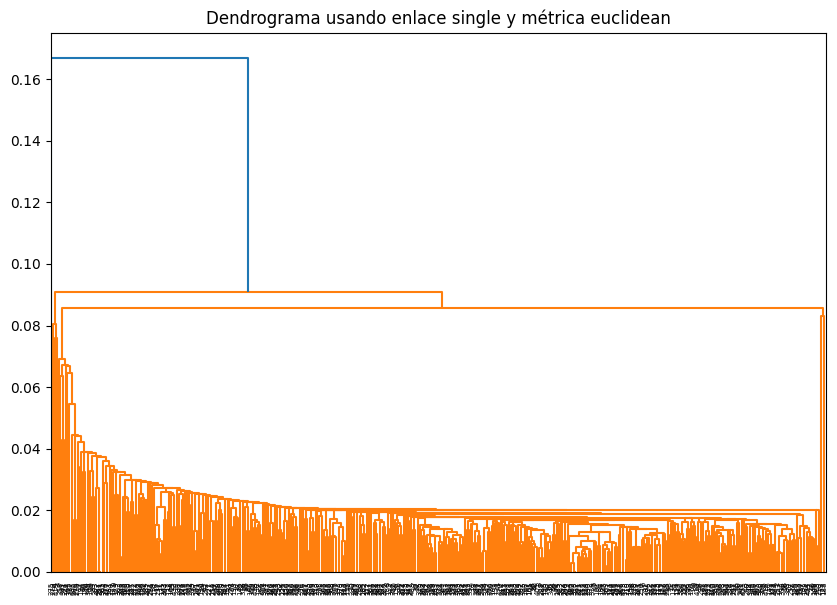

In [ ]:
dendrograph(data_scaled, 'single')

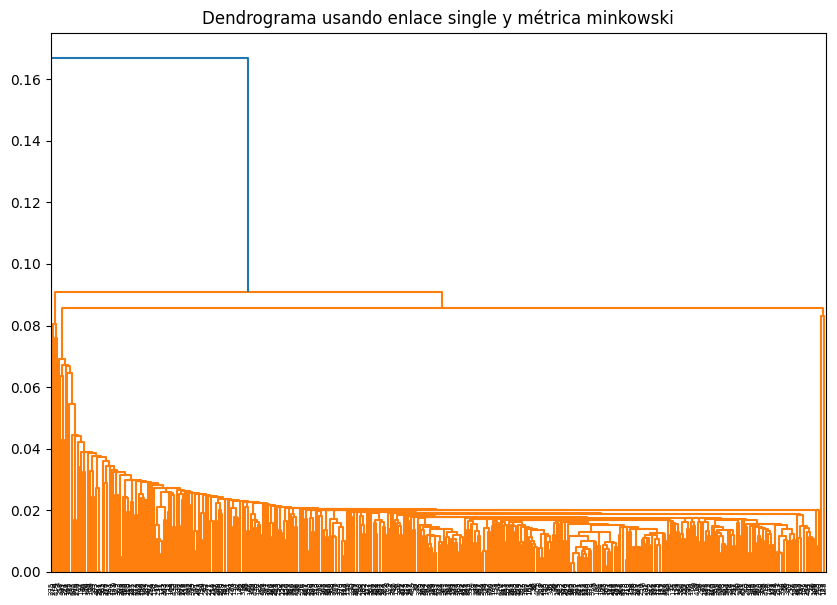

In [ ]:
dendrograph(data_scaled, 'single', 'minkowski')

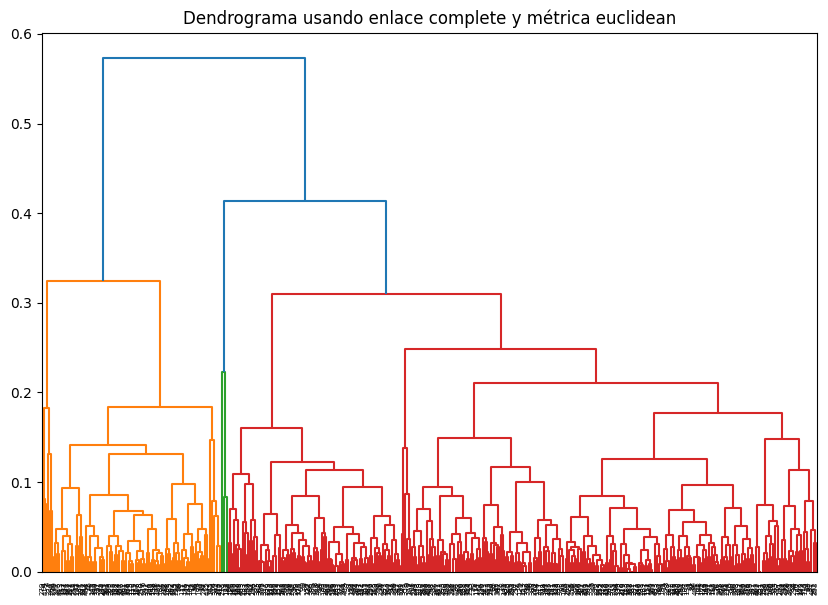

In [ ]:
dendrograph(data_scaled, 'complete')

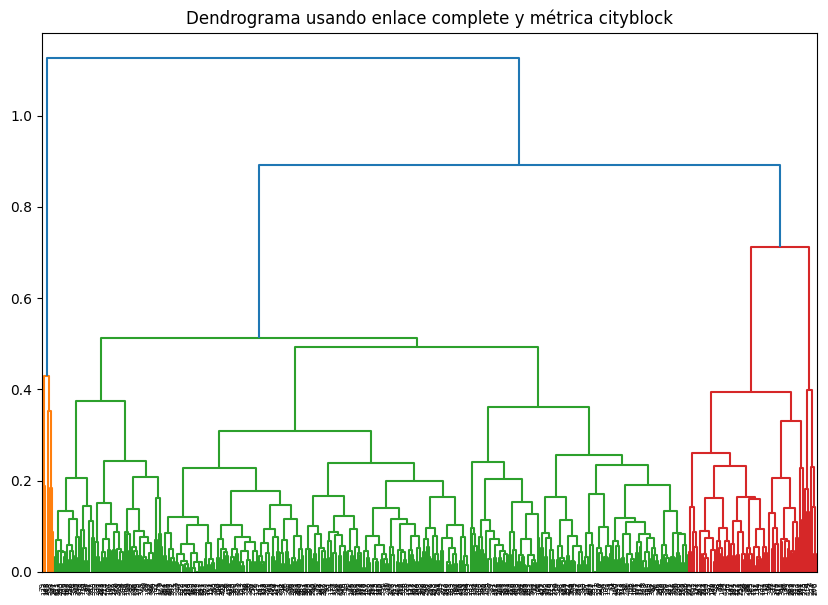

In [ ]:
dendrograph(data_scaled, 'complete', 'cityblock')

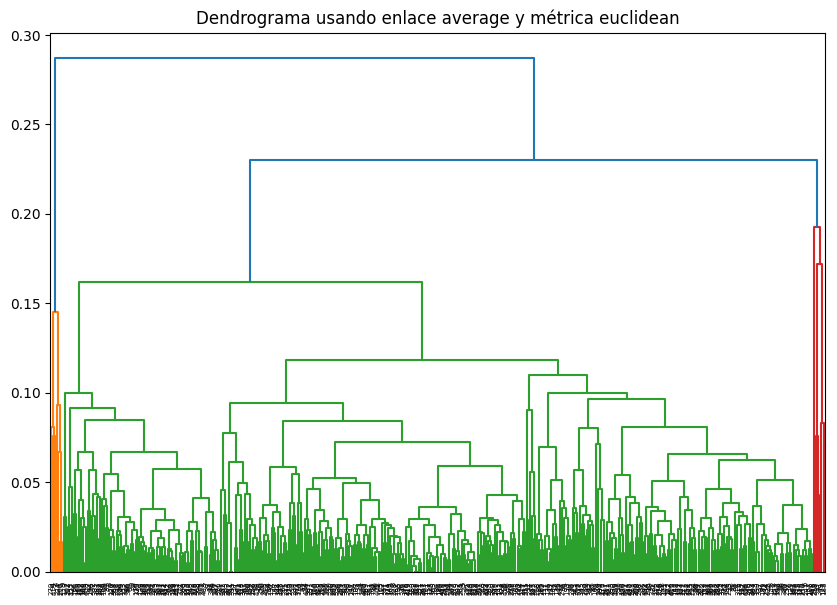

In [ ]:
dendrograph(data_scaled, 'average')

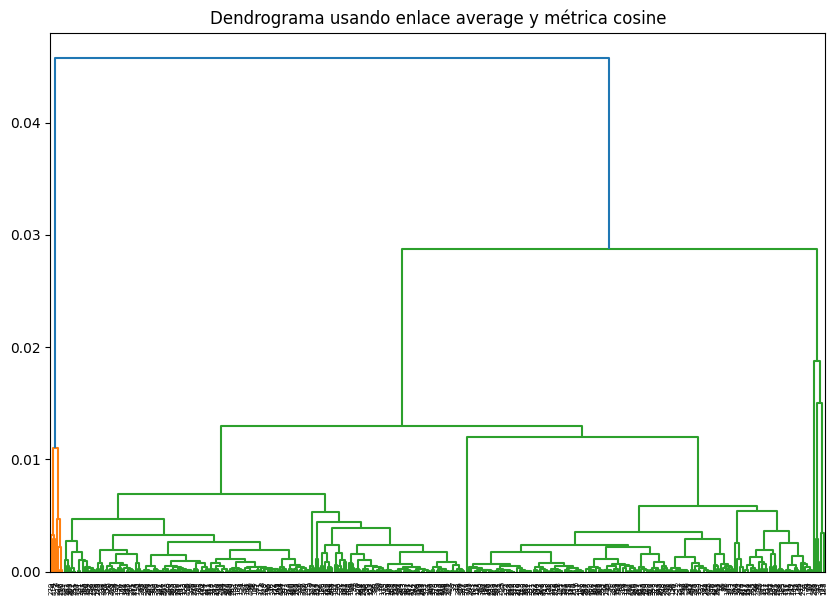

In [ ]:
dendrograph(data_scaled, 'average', 'cosine')

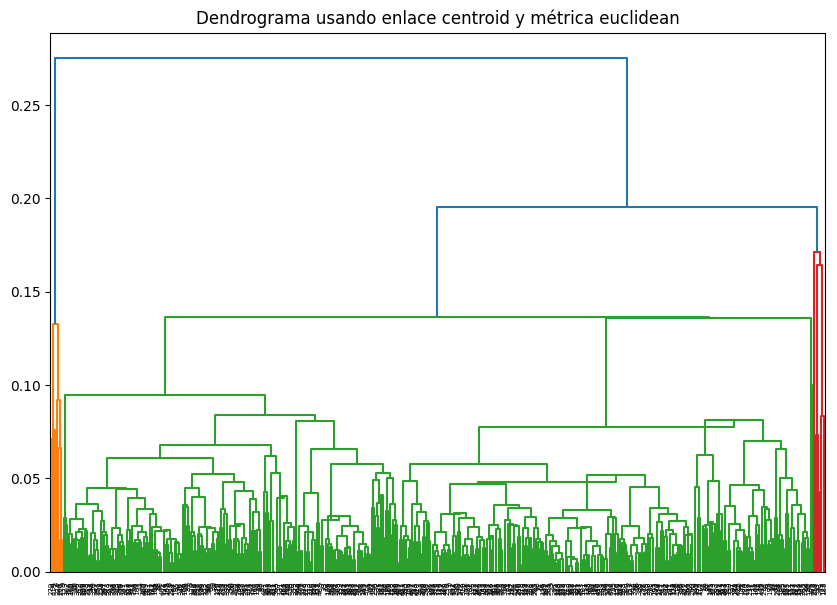

In [ ]:
dendrograph(data_scaled, 'centroid') #solo admite euclideana

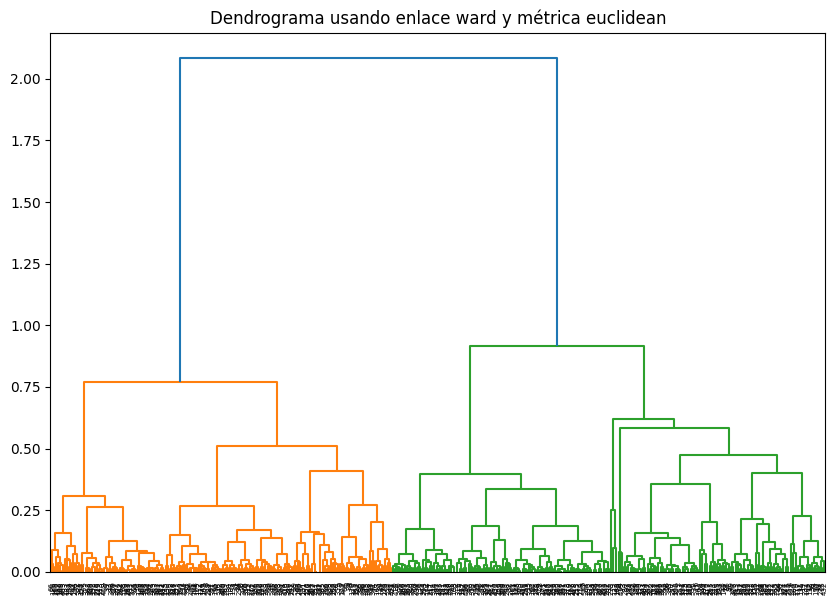

In [ ]:
dendrograph(data_scaled, 'ward') #solo admite euclideana

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='cityblock',
                                  linkage='complete')
cluster.fit_predict(data_scaled)

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

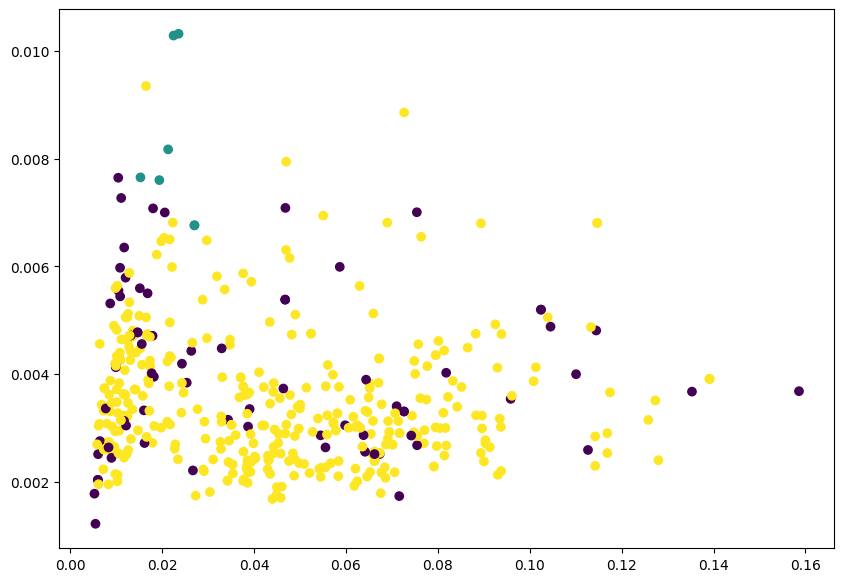

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['residual sugar'], data_scaled['sulphates'], c=cluster.labels_)

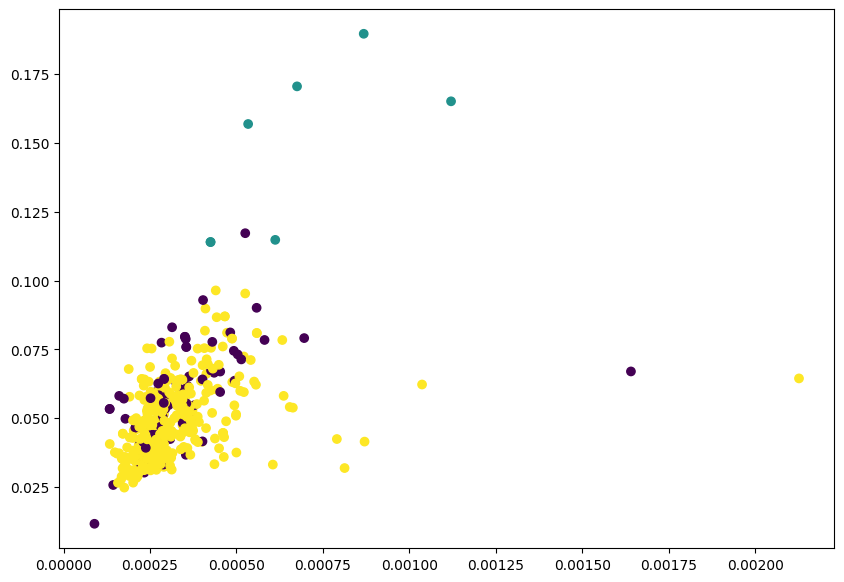

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['chlorides'], data_scaled['fixed acidity'], c=cluster.labels_)

In [ ]:
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import warnings
from itertools import cycle, islice


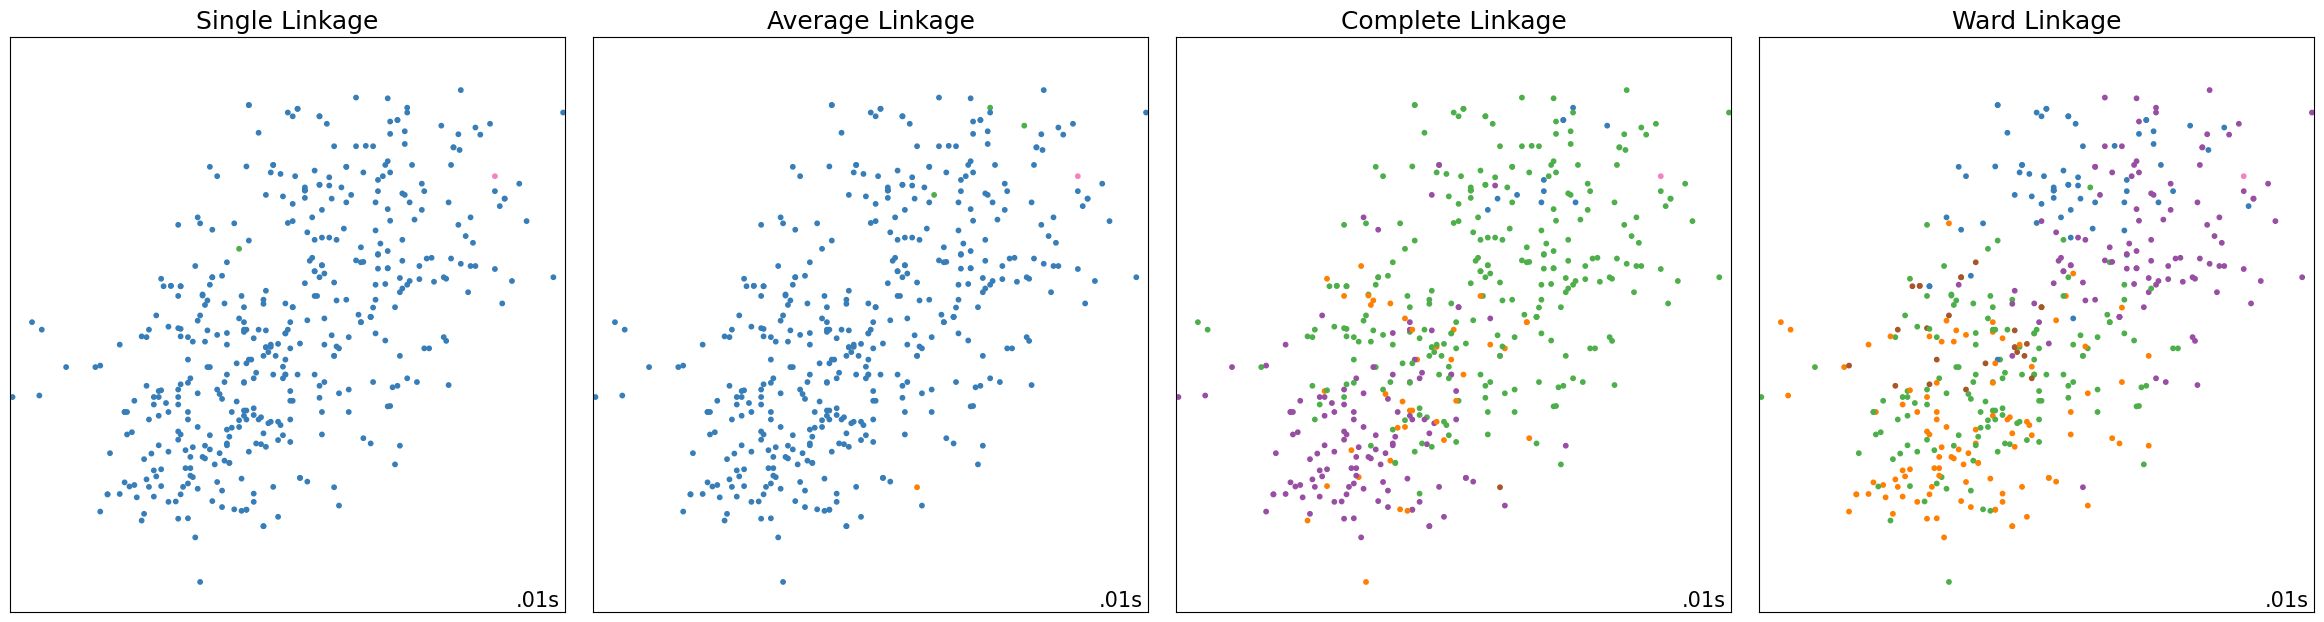

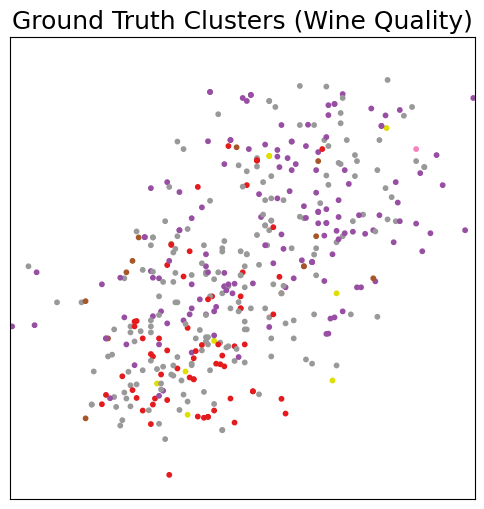

In [ ]:
data = pd.read_csv('/content/winequality-white.csv', delimiter=';', index_col=0)
idx = np.random.randint(0, data.shape[0], 440)
data = data.iloc[idx, :]
y = data['quality'].reset_index(drop=True)
n_clusters_wine = len(data['quality'].unique())
X = data.iloc[:, :-1].reset_index(drop=True)

plt.figure(figsize=(24, 6))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": n_clusters_wine}

datasets = [
    ((X, y), {"n_clusters": n_clusters_wine}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        x_0 = 5
        x_1 = 6
        plt.scatter(X[:, x_0], X[:, x_1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        #plt.xlabel(f"Feature space for the feature {x_0}")
        #plt.ylabel(f"Feature space for the feature {x_1}")
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.figure(figsize=(6, 6))

colors = np.array(
    list(
        islice(
            cycle(
                [
                    "#377eb8",
                    "#ff7f00",
                    "#4daf4a",
                    "#f781bf",
                    "#a65628",
                    "#984ea3",
                    "#999999",
                    "#e41a1c",
                    "#dede00",
                ]
            ),
            int(max(y) + 1),
        )
    )
)

plt.scatter(X[:, x_0], X[:, x_1], s=10, color=colors[y])
plt.title("Ground Truth Clusters (Wine Quality)", size=18)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.show()


plt.show()


Referencias:

Hastie, Tibhirani, Friedman, The Elements of  Statistical Learning: Data Mining, Inference, and Prediction.

F. Nielsen, Introduction to HPC with MPI for Data Science, Undergraduate. Topics in Computer Science

https://la.mathworks.com/help/stats/linkage.html#mw_08b425f7-fc8c-480a-b618-f768817e8e11

https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py